#### This is a standalone file to allow users to explore the likelihood of models compared to Kepler transit multiplicities across our 3D parameter space.

The only other file needed, logLs_incremental_corrected.txt, is the model results, which can be accessed through Dropbox (you just need to sign in on your account). Caution: it's 112 MB! https://www.dropbox.com/sh/ijtx58sty860aim/AABVScv0AqlTjzWPNPnC4Cd3a?dl=0

In [1]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
#path = 

k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [2]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [3]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv('hipergator/logLs_incremental_corrected.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats


                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL transit_multiplicity intact_frac disrupted_frac  \
0  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
1  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
2  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
3  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
4  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   

          intact_logL  ...          old40_logL old

In [4]:
df = df.loc[(df.m <= 0.) & (df.m >= -2.) & (df.b >= 0.) & (df.b <= 1.) & (df.logL <= 0.)].dropna(subset=['logL'])

In [5]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)


/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_2951/3235774913.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first]


### Log likelihood heatmap of discretely sampled models in 3D parameter space.

Parameters are: 1) how fast putative "dynamical sculpting" occurs (dP(intact)/dt), 2) the age at which dynamical sculpting ceases (cutoff time), and 3) the initial fraction of dynamically cool systems (initial P(intact)). 

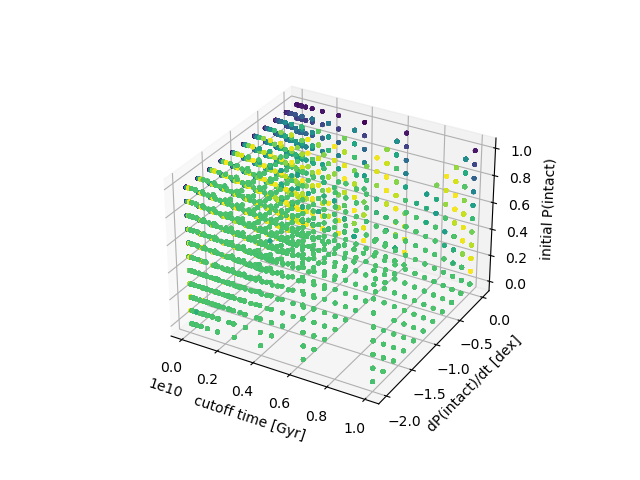

In [6]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(df.c, df.m, df.b, c=df.normalized_logL, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

### Same as above, but isolating only best models (logL >= -100)

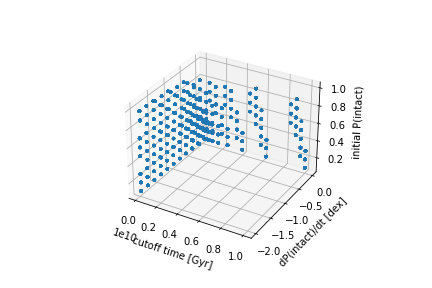

In [231]:
%matplotlib widget

df_keep = df.loc[df.normalized_logL >= -100]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

3D contour version of above plot

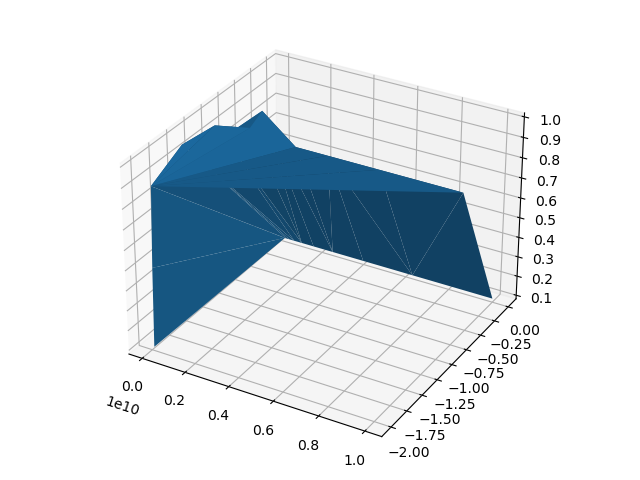

In [8]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(df_keep.c, df_keep.m, df_keep.b)
fig.tight_layout()
plt.show()

### Comparison of two "good" models

Colored in orange and purple in the 3D plot below are two models with logL > -30 (two of the best "good" models) that represent entirely different dynamical sculpting timescales. Orange corresponds with moderately fast dynamical sculpting that lasts 1 Gyr (as well as an initially high fraction of dynamically cool systems), while purple corresponds with slow dynamical sculpting that proceeds at cosmological timescales (as well as a moderate initial fraction of dynamically cool systems).

In [66]:
df_keep.loc[(df_keep.b == 0.5) & (df_keep.m > -2.)]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,young45_logL,young45_transit_multiplicity,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL
18252,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.5,1.584893e+08,0.1,-248.018219,"[389.3, 59.7, 18.5, 12.4, 6.6000000000000005, ...",0.037345,0.062655,-1957.291906,...,-793.188032,"[176.8, 26.900000000000002, 8.0, 5.7, 3.400000...",-645.152830,"[212.5, 32.800000000000004, 10.5, 6.7, 3.2, 0....",-704.792260,"[197.3, 30.200000000000003, 9.200000000000001,...",-724.701578,"[192.0, 29.5, 9.3, 6.0, 2.8000000000000003, 0....","[818.0248052480525, 125.4458794587946, 38.8735...",-24.112253
18253,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.5,1.584893e+08,0.1,-257.146429,"[384.40000000000003, 60.5, 14.9, 13.7000000000...",0.037299,0.062701,-1981.325970,...,-794.207741,"[172.9, 31.1, 7.0, 7.0, 4.0, 0.5]",-668.908901,"[211.5, 29.400000000000002, 7.9, 6.7, 2.300000...",-703.171564,"[194.70000000000002, 34.4, 7.7, 7.800000000000...",-754.609373,"[189.70000000000002, 26.1, 7.2, 5.9, 2.0, 0.8]","[818.80714879468, 128.87053200332502, 31.73836...",-25.877399
18254,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.5,1.584893e+08,0.1,-243.369572,"[388.6, 62.5, 20.3, 13.100000000000001, 5.8000...",0.037379,0.062621,-1931.875578,...,-779.180543,"[176.60000000000002, 29.6, 9.0, 6.600000000000...",-644.871561,"[212.0, 32.9, 11.3, 6.5, 3.2, 0.6000000000000001]",-686.656226,"[199.0, 32.9, 10.100000000000001, 7.3000000000...",-730.691215,"[189.60000000000002, 29.6, 10.200000000000001,...","[810.4069175991862, 130.3407934893184, 42.3346...",-23.508971
18255,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.5,1.584893e+08,0.2,-25.342359,"[778.6, 119.4, 37.0, 24.8, 13.200000000000001,...",0.074689,0.125311,-1346.016046,...,-304.512172,"[353.6, 53.800000000000004, 16.0, 11.4, 6.8000...",-200.676970,"[425.0, 65.60000000000001, 21.0, 13.4, 6.4, 0....",-242.216400,"[394.6, 60.400000000000006, 18.400000000000002...",-254.125718,"[384.0, 59.0, 18.6, 12.0, 5.6000000000000005, ...","[818.0248052480525, 125.4458794587946, 38.8735...",-24.112253
18256,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.5,1.584893e+08,0.2,-27.870569,"[768.8000000000001, 121.0, 29.8, 27.4000000000...",0.074599,0.125401,-1368.450110,...,-306.231881,"[345.8, 62.2, 14.0, 14.0, 8.0, 1.0]",-217.133041,"[423.0, 58.800000000000004, 15.8, 13.4, 4.6000...",-242.195704,"[389.40000000000003, 68.8, 15.4, 15.6000000000...",-275.833513,"[379.40000000000003, 52.2, 14.4, 11.8, 4.0, 1.6]","[818.80714879468, 128.87053200332502, 31.73836...",-25.877399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,1.0,-2322.100671,"[3858.0, 627.0, 212.0, 146.0, 70.0, 16.0]",0.418687,0.581313,-481.371283,...,-491.083230,"[1737.0, 320.0, 114.0, 85.0, 43.0, 10.0]",-654.317319,"[2121.0, 307.0, 98.0, 61.0, 27.0, 6.0]",-644.722622,"[1940.0, 353.0, 128.0, 92.0, 48.0, 13.0]",-497.069510,"[1918.0, 274.0, 84.0, 54.0, 22.0, 3.0]","[802.2824102251979, 130.38648813146682, 44.086...",-27.805274
64808,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,1.0,-2264.328927,"[3767.0, 608.0, 198.0, 164.0, 97.0, 14.0]",0.424547,0.575453,-492.067589,...,-510.643458,"[1704.0, 325.0, 117.0, 99.0, 65.0, 10.0]",-601.758658,"[2063.0, 283.0, 81.0, 65.0, 32.0, 4.0]",-644.849942,"[1885.0, 360.0, 126.0, 105.0, 69.0, 11.0]",-466.536469,"[1882.0, 248.0, 72.0, 59.0, 28.0, 3.0]","[796.4469884488449, 128.54785478547853, 41.862...",-34.049404
64809,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,1.0,-2360.496923,"[3831.0, 664.0, 221.0, 159.0, 84.0, 14.0]",0.422579,0.577421,-529.591547,...,-513.687839,"[1710.0, 348.0, 126.0, 99.0, 44.0, 9.0]",-666.909629,"[2121.0,

In [9]:
df_keep.loc[(df_keep.normalized_logL>-30) & (df_keep.c>=1e9) & (df_keep.m < 0)]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,young45_logL,young45_transit_multiplicity,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL
39691,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.8,0.9,1.000000e+09,0.1,-267.712003,"[386.40000000000003, 54.800000000000004, 13.0,...",0.029211,0.070789,-2172.805779,...,-810.659817,"[176.10000000000002, 26.5, 6.5, 3.2, 1.9000000...",-687.141607,"[210.3, 28.3, 6.5, 4.7, 1.3, 0.4]",-721.019542,"[197.10000000000002, 30.200000000000003, 6.800...",-771.815444,"[189.3, 24.6, 6.2, 4.3, 1.1, 0.30000000000000004]","[849.9141630901288, 120.53648068669528, 28.594...",-18.743189
39692,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.8,0.9,1.000000e+09,0.1,-266.212586,"[388.3, 52.6, 13.700000000000001, 10.100000000...",0.029550,0.070450,-2216.367015,...,-825.040497,"[173.9, 25.200000000000003, 5.800000000000001,...",-669.387921,"[214.4, 27.400000000000002, 7.9, 5.5, 2.2, 0.5]",-729.477985,"[196.3, 27.5, 6.9, 5.1000000000000005, 2.1, 0....",-754.875972,"[192.0, 25.1, 6.800000000000001, 5.0, 1.6, 0.5]","[847.7263045793397, 114.83493077742278, 29.909...",-21.413503
39693,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.8,0.9,1.000000e+09,0.1,-269.731807,"[391.0, 52.900000000000006, 10.600000000000001...",0.029212,0.070788,-2281.070847,...,-812.432453,"[178.5, 25.5, 5.1000000000000005, 3.6, 2.0, 0.5]",-687.299146,"[212.5, 27.400000000000002, 5.5, 5.10000000000...",-724.720685,"[198.8, 28.3, 6.1000000000000005, 4.0, 2.1, 0.5]",-769.918110,"[192.20000000000002, 24.6, 4.5, 4.7, 1.7000000...","[856.90613641223, 115.93435963224289, 23.23070...",-22.795459
39694,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.8,0.9,1.000000e+09,0.2,-23.236143,"[772.8000000000001, 109.60000000000001, 26.0, ...",0.058422,0.141578,-1533.329919,...,-314.683957,"[352.20000000000005, 53.0, 13.0, 6.4, 3.800000...",-228.165747,"[420.6, 56.6, 13.0, 9.4, 2.6, 0.8]",-250.743682,"[394.20000000000005, 60.400000000000006, 13.60...",-287.139584,"[378.6, 49.2, 12.4, 8.6, 2.2, 0.6000000000000001]","[849.9141630901288, 120.53648068669528, 28.594...",-18.743189
39695,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.8,0.9,1.000000e+09,0.2,-25.236726,"[776.6, 105.2, 27.400000000000002, 20.20000000...",0.059101,0.140899,-1579.191155,...,-326.164637,"[347.8, 50.400000000000006, 11.600000000000001...",-216.812061,"[428.8, 54.800000000000004, 15.8, 11.0, 4.4, 1.0]",-257.502125,"[392.6, 55.0, 13.8, 10.200000000000001, 4.2, 1...",-275.400112,"[384.0, 50.2, 13.600000000000001, 10.0, 3.2, 1.0]","[847.7263045793397, 114.83493077742278, 29.909...",-21.413503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64797,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,0.9,-1937.195200,"[3472.2000000000003, 564.3000000000001, 190.8,...",0.376819,0.523181,-473.965811,...,-368.177759,"[1563.3, 288.0, 102.60000000000001, 76.5, 38.7...",-500.311847,"[1908.9, 276.3, 88.2, 54.9, 24.3, 5.4]",-495.317151,"[1746.0, 317.7, 115.2, 82.8, 43.2, 11.70000000...",-369.564039,"[1726.2, 246.6, 75.60000000000001, 48.6, 19.8,...","[802.2824102251979, 130.38648813146685, 44.086...",-27.805274
64801,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,0.9,-2009.083952,"[3533.4, 592.2, 192.6, 135.0, 62.1, 14.4]",0.379779,0.520221,-489.632510,...,-411.732561,"[1599.3, 303.3, 121.5, 81.0, 36.9, 12.6]",-508.767435,"[1934.1000000000001, 288.90000000000003, 71.10...",-527.244028,"[1766.7, 325.8, 133.20000000000002, 89.1000000...",-391.579354,"[1766.7, 266.40000000000003, 59.4, 45.9, 22.5,...","[799.5529505265249, 134.00556328233657, 43.582...",-27.496129
64804,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.5,1.000000e+10,1.0,-2301.167570,"[3809.0, 618.0, 235.0, 152.0, 70.0, 16.0]",0.420857,0.579143,-469.171023,...,-502.812804

In [10]:
print(df_keep.loc[df_keep.index==39691])
print(df_keep.loc[df_keep.index==64811])

                                                filename    m    b  \
39691  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   

                  c    f        logL  \
39691  1.000000e+09  0.1 -267.712003   

                                    transit_multiplicity  intact_frac  \
39691  [386.40000000000003, 54.800000000000004, 13.0,...     0.029211   

       disrupted_frac  intact_logL  ... young45_logL  \
39691        0.070789 -2172.805779  ...  -810.659817   

                            young45_transit_multiplicity  old45_logL  \
39691  [176.10000000000002, 26.5, 6.5, 3.2, 1.9000000... -687.141607   

              old45_transit_multiplicity young50_logL  \
39691  [210.3, 28.3, 6.5, 4.7, 1.3, 0.4]  -721.019542   

                            young50_transit_multiplicity  old50_logL  \
39691  [197.10000000000002, 30.200000000000003, 6.800... -771.815444   

                              old50_transit_multiplicity  \
39691  [189.3, 24.6, 6.2, 4.3, 1.1, 0.300000000000000

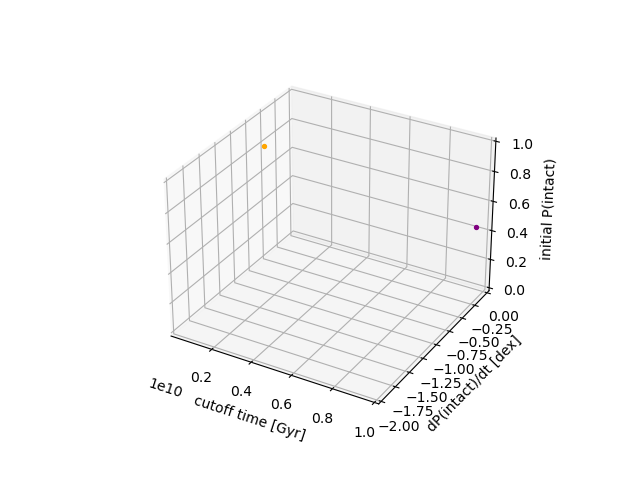

In [12]:
%matplotlib widget

df_keep = df.loc[df.normalized_logL >= -100]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
one = 39691 # 1220
two = 64811 # 73279
im1 = ax.scatter3D(df_keep.loc[df_keep.index==one].c, df_keep.loc[df_keep.index==one].m, df_keep.loc[df_keep.index==one].b, s=8, c='orange')
im2 = ax.scatter3D(df_keep.loc[df_keep.index==two].c, df_keep.loc[df_keep.index==two].m, df_keep.loc[df_keep.index==two].b, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

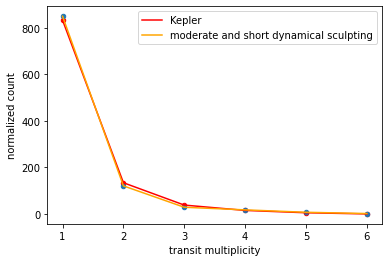

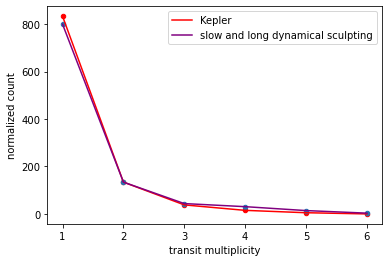

In [13]:
%matplotlib inline

temp_df = df_keep.loc[df_keep.index==one]
plt.plot(np.arange(len(k))+1, k, color='r', label='Kepler')
plt.scatter(np.arange(len(k))+1, k, color='r', s=20)
plt.plot(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], label='moderate and short dynamical sculpting', color='orange')
plt.scatter(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], s=20)
plt.xlabel('transit multiplicity')
plt.ylabel('normalized count')
plt.legend()
plt.show()

temp_df = df_keep.loc[df_keep.index==two]
plt.plot(np.arange(len(k))+1, k, color='r', label='Kepler')
plt.scatter(np.arange(len(k))+1, k, color='r', s=20)
plt.plot(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], label='slow and long dynamical sculpting', color='purple')
plt.scatter(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], s=20)
plt.xlabel('transit multiplicity')
plt.ylabel('normalized count')
plt.legend()
plt.show()

#### Let's explore why moderate sculpting over 1 Gyr can create the same "good" model as slow sculpting over ~10 Gyrs. 

In [20]:
path = '/Users/chrislam/Desktop/sculpting/'
pnum = pd.read_csv(path+'pnum_plus_cands_fgk.csv')
pnum = pnum.drop_duplicates(['kepid'])
k = pnum.koi_count.value_counts() 

7
119
142
125
125
105
90
88
61
48
115


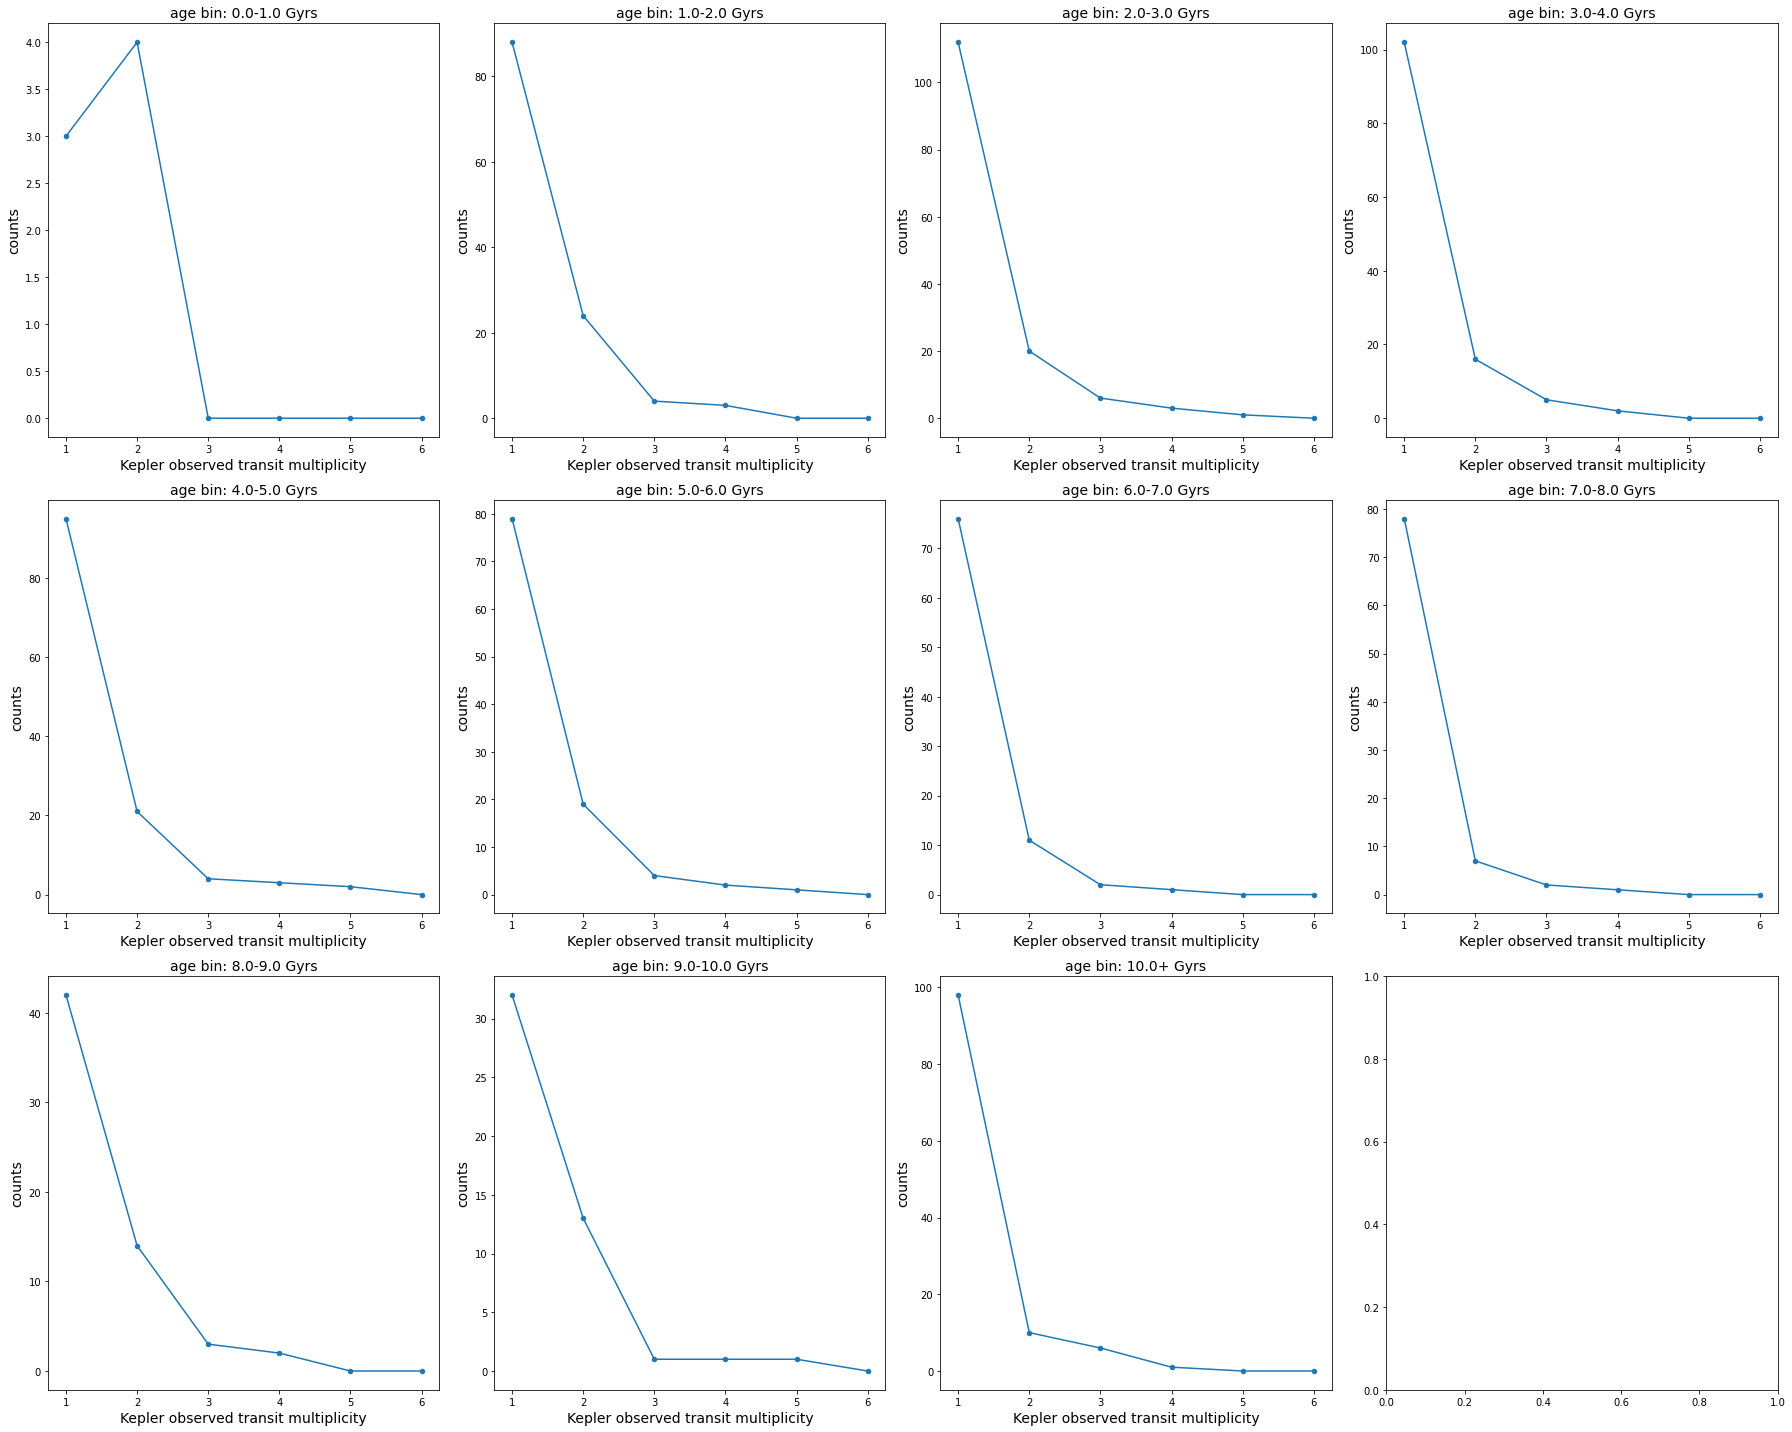

In [61]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()

for i, a in enumerate(np.linspace(0,10,11)):
    if a < 10:
        temp = pnum.loc[(pnum.iso_age > a) & (pnum.iso_age <= a+1)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    #k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    ax = axes[i]
    ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
    ax.plot(np.arange(len(k_temp))+1, k_temp)
    if a < 10:
        ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
    else:
        ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
    ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
    ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

126
267
230
178
109
115


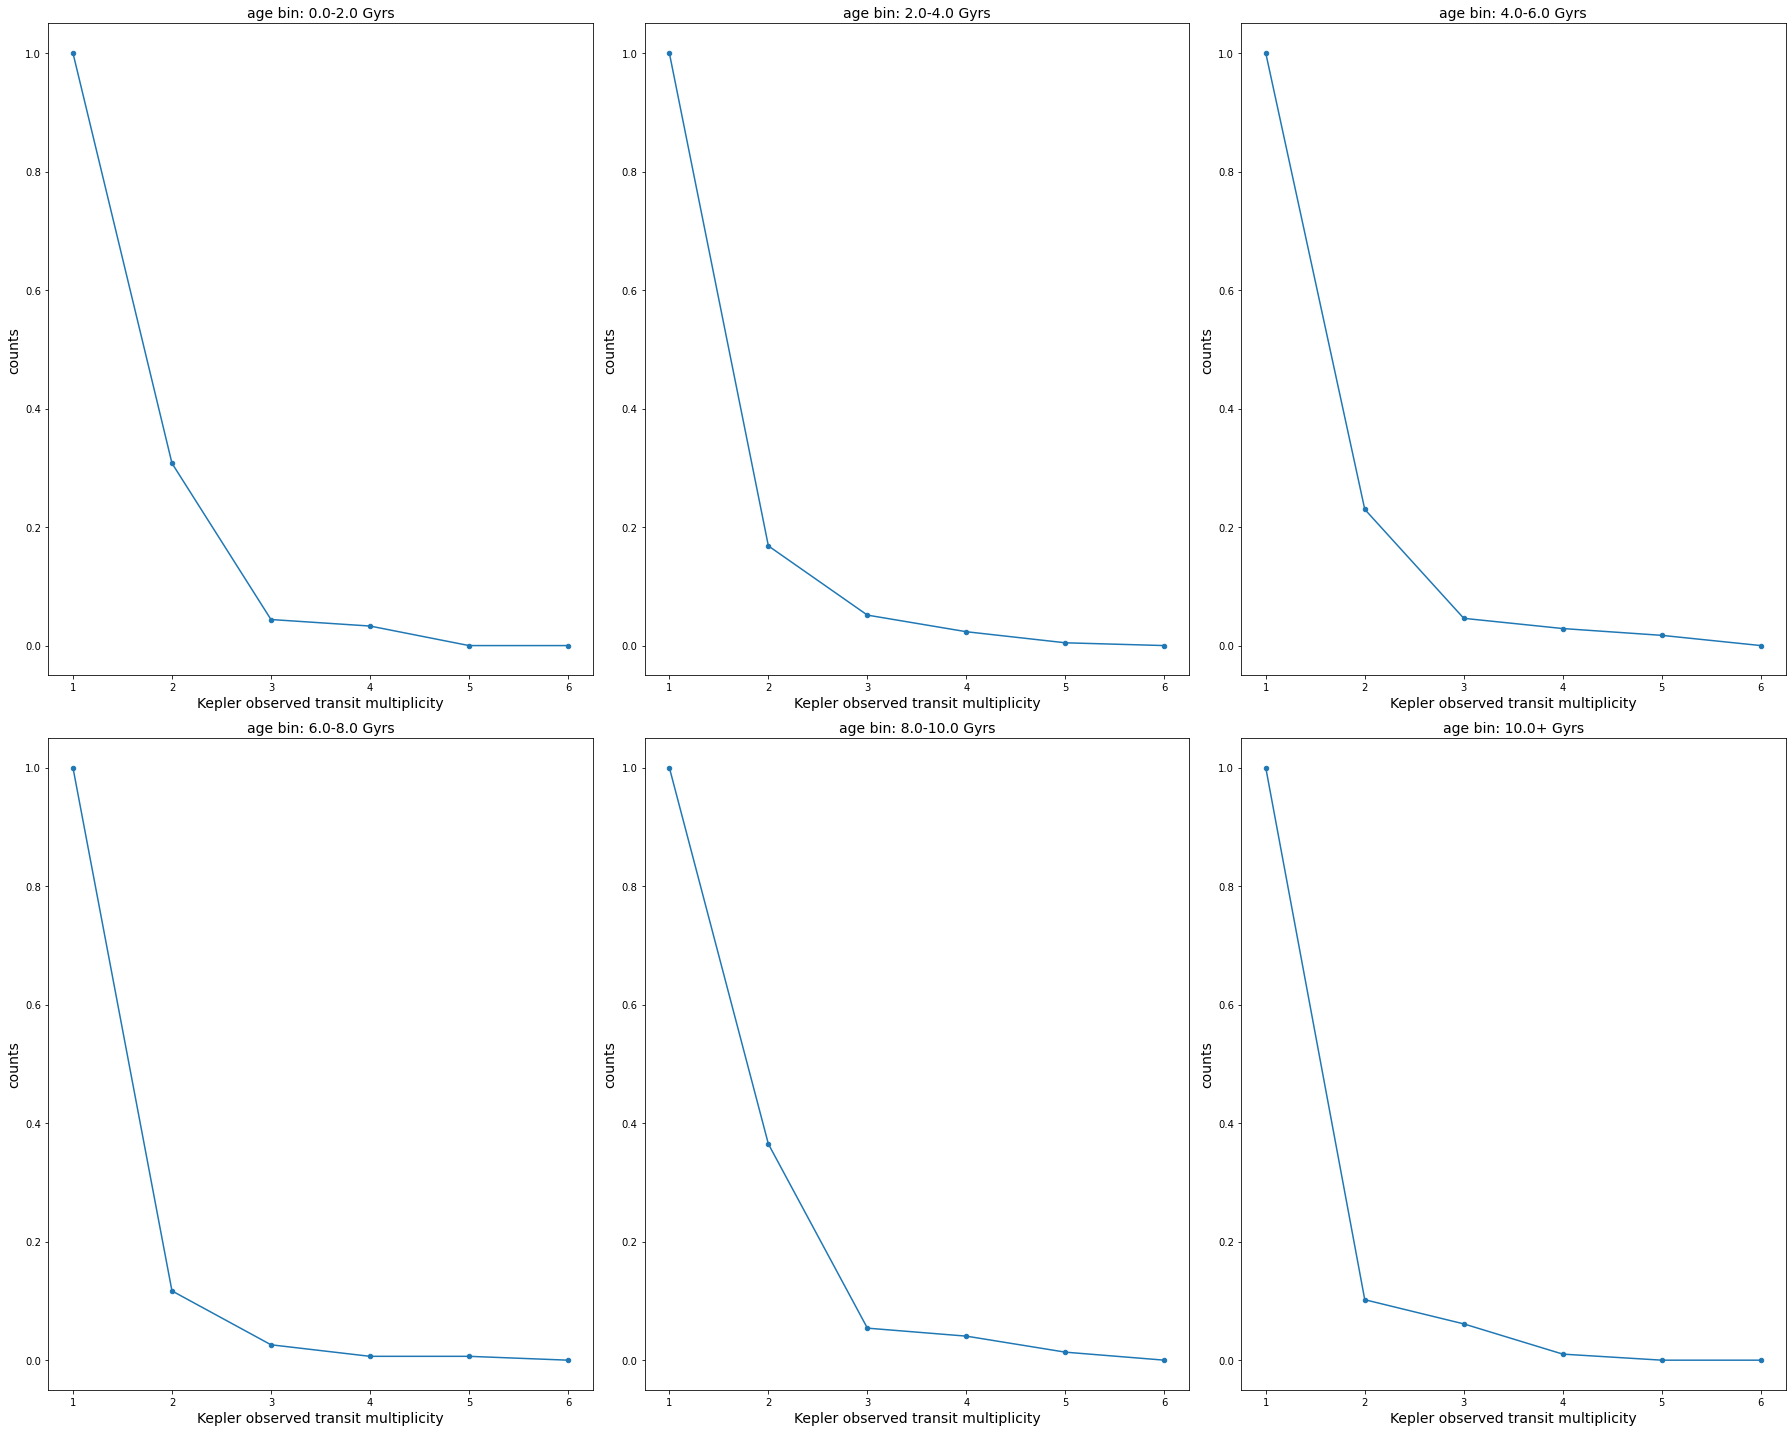

In [63]:
%matplotlib inline

fig, axes = plt.subplots(2,3, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()

for i, a in enumerate(np.linspace(0,5,6)):
    if a < 5:
        temp = pnum.loc[(pnum.iso_age > a*2) & (pnum.iso_age <= a*2+2)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a*2]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    ax = axes[i]
    ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
    ax.plot(np.arange(len(k_temp))+1, k_temp)
    if a < 5:
        ax.set_title(f"age bin: {2*a}-{2*a+2} Gyrs", fontsize=14)
    else:
        ax.set_title(f"age bin: {2*a}+ Gyrs", fontsize=14)
    ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
    ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

In [71]:
np.nanmedian(pnum.loc[(pnum.iso_age > 8.) & (pnum.iso_age < 10)].iso_teff)

5677.05

In [70]:
np.nanmedian(pnum.iso_teff)

5929.6

#### G dwarf only

0
no stars in that bin
0
no stars in that bin
4
33
67
95
79
83
59
44
97


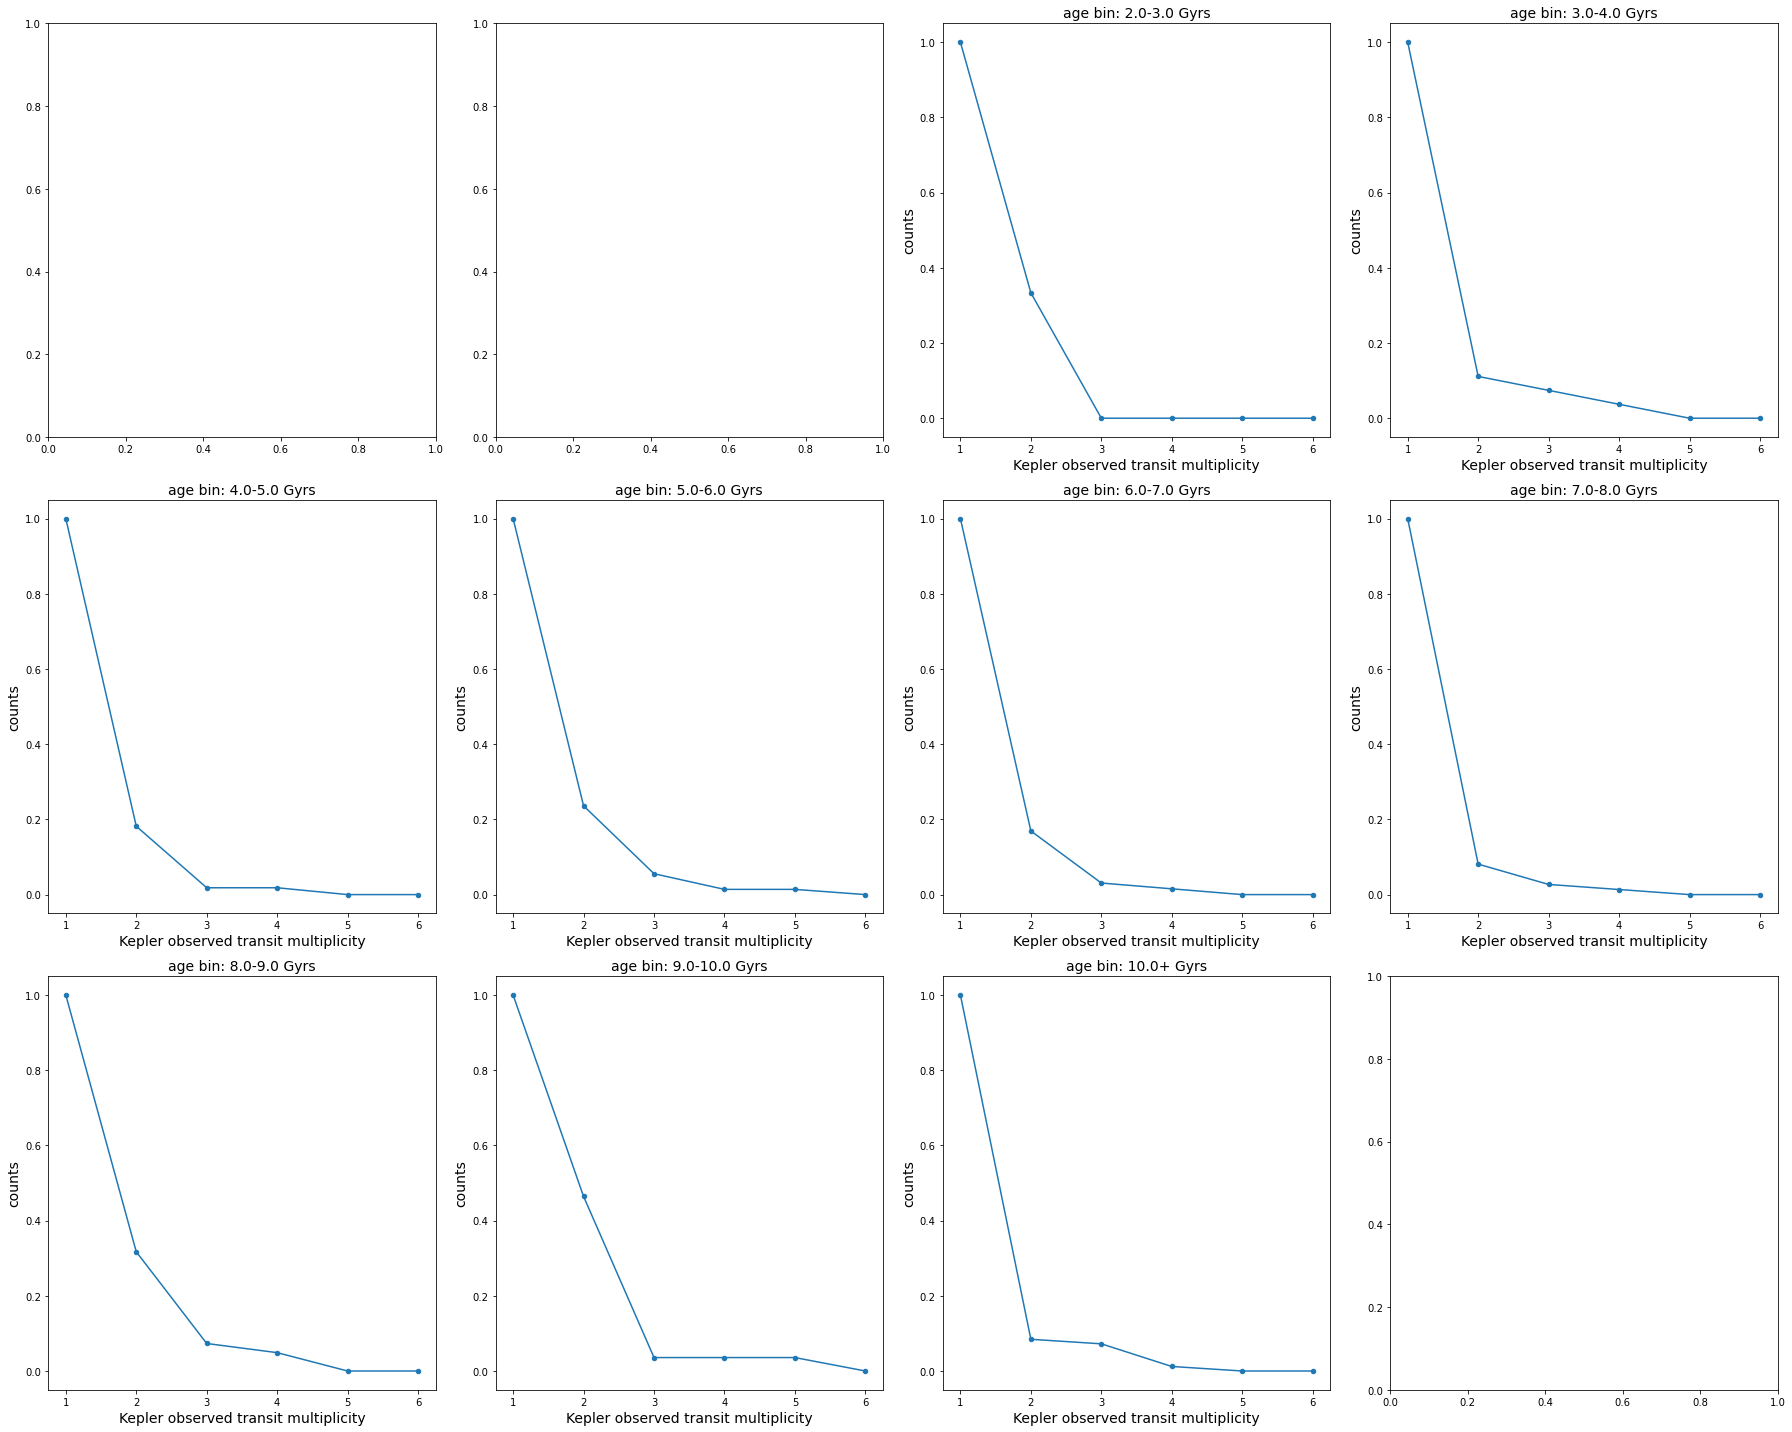

In [120]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 5300) & (pnum.iso_teff < 6000)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### F type only

7
119
138
92
58
9
5
1
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin


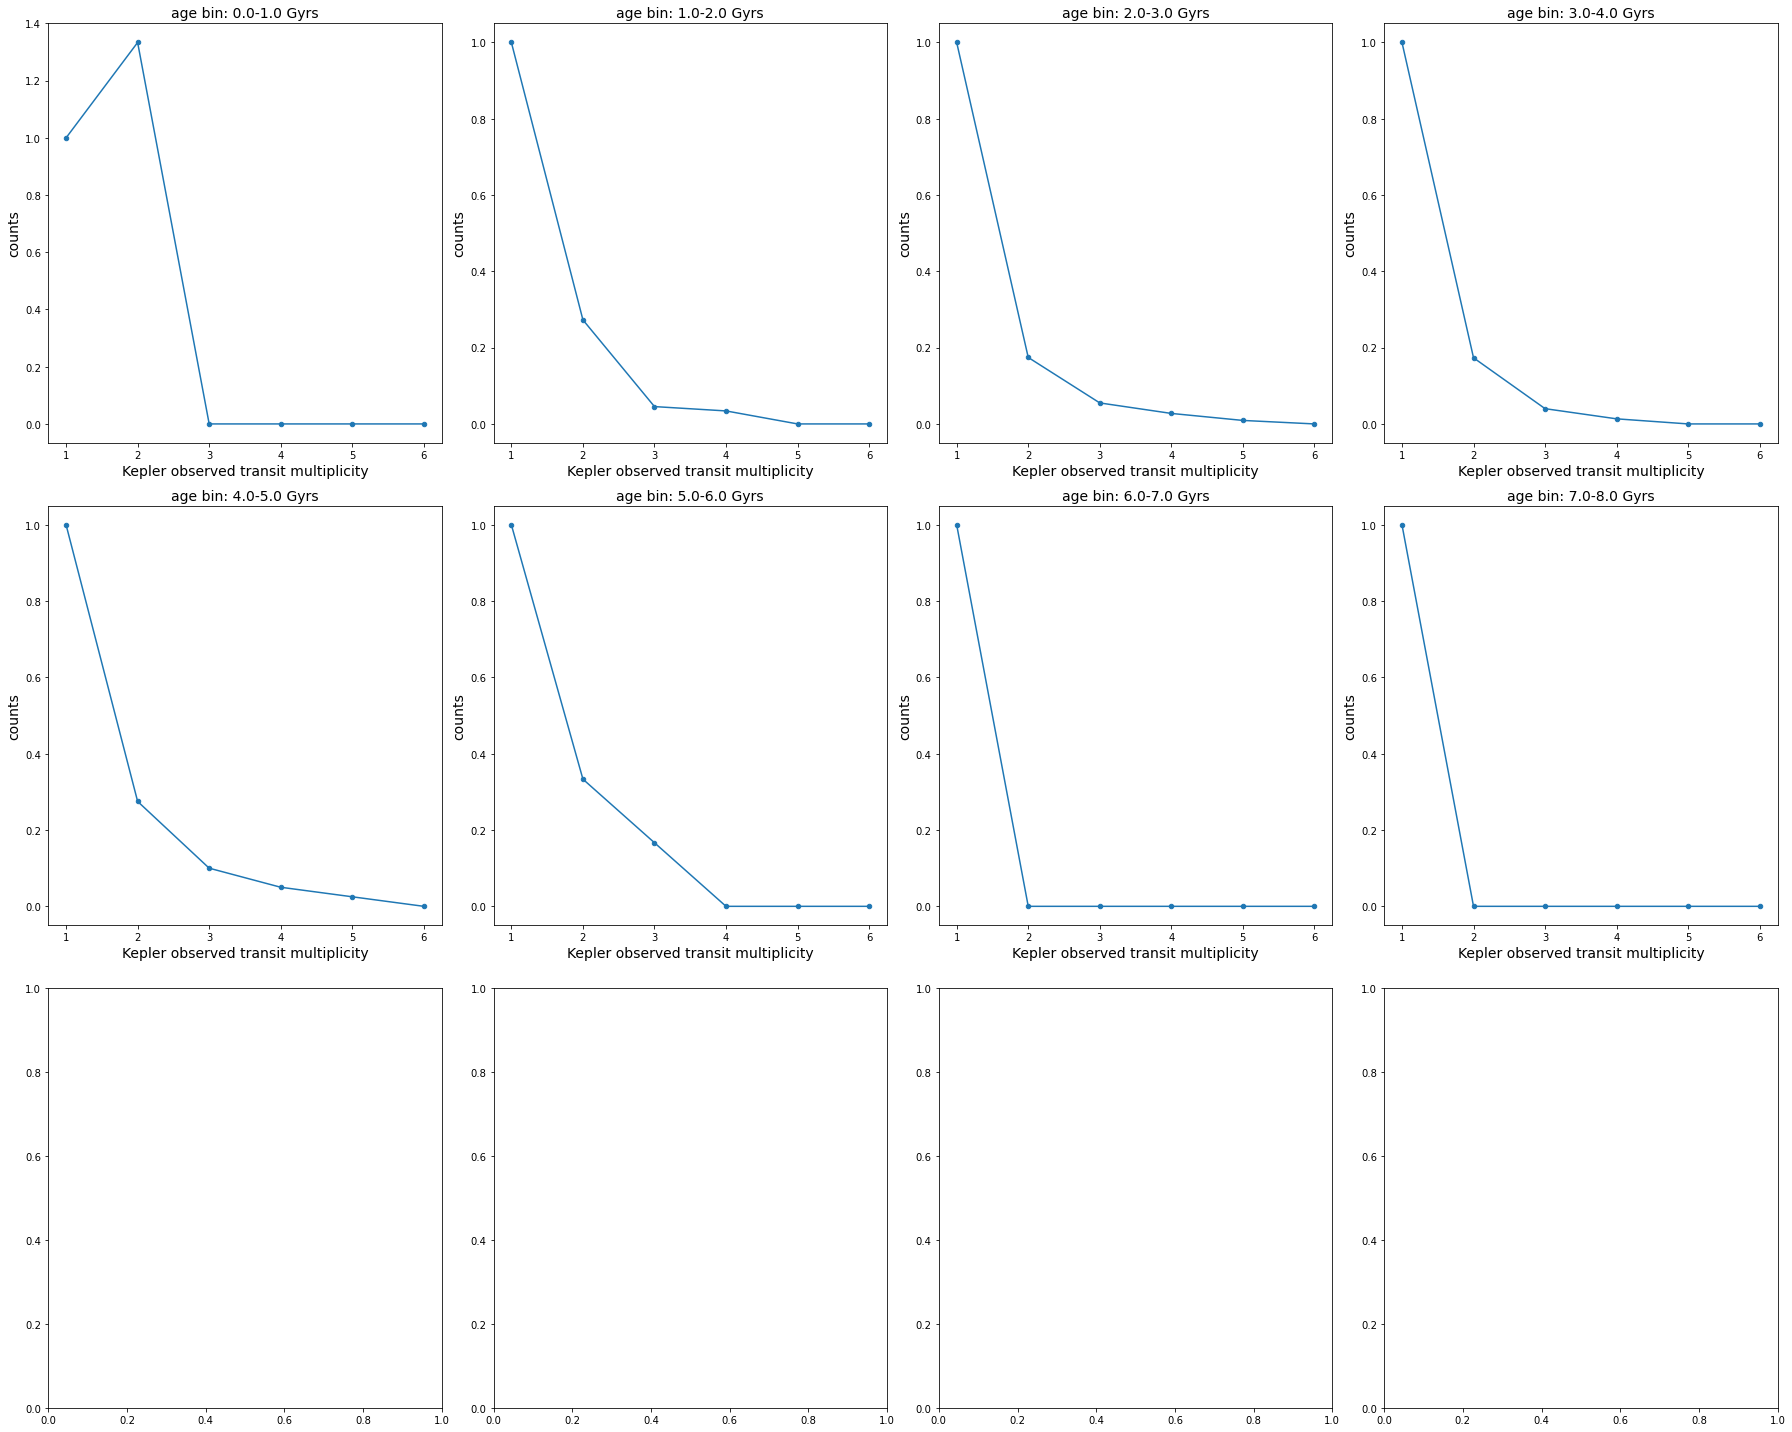

In [121]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 6000) & (pnum.iso_teff < 7600)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### K type

0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
1
6
4
2
4
18


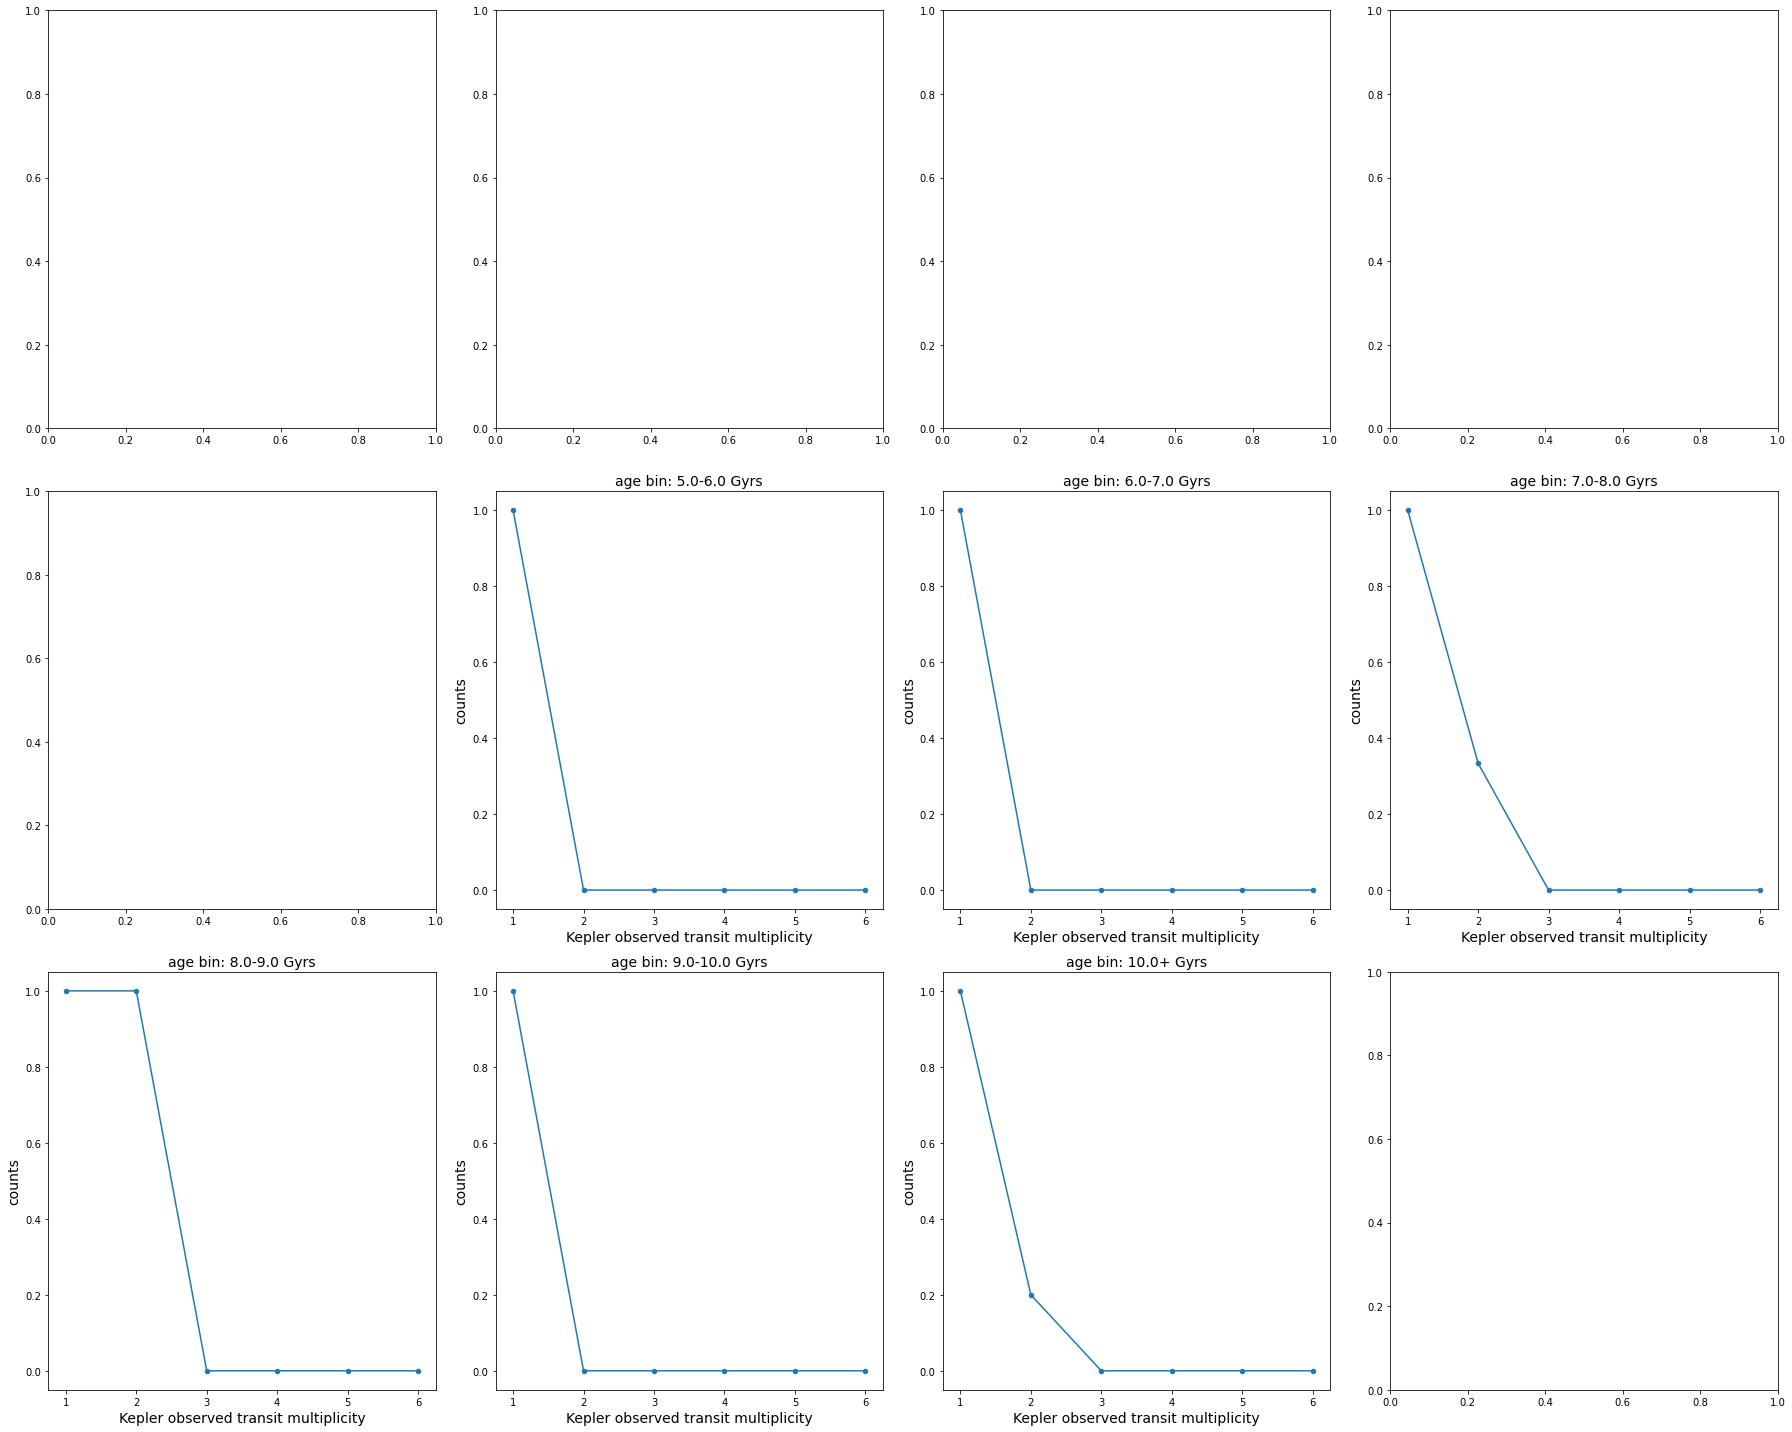

In [122]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 3900) & (pnum.iso_teff < 5300)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### Split by spectral type

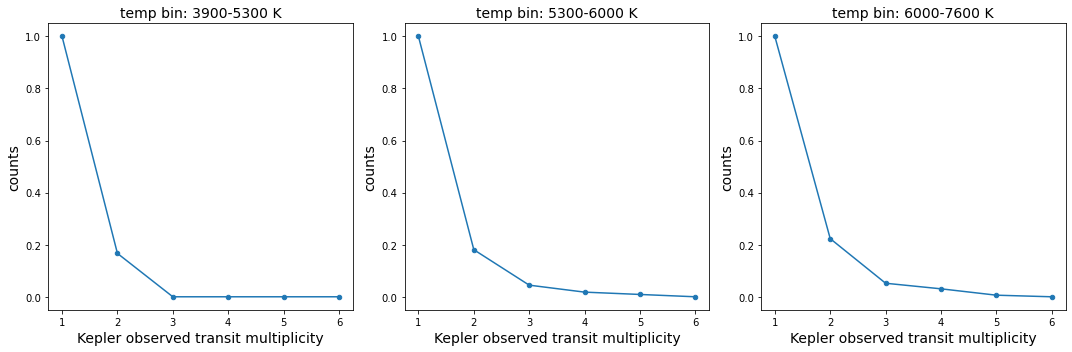

In [78]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
temps = [3900, 5300, 6000, 7600]

for i, a in enumerate(temps):
    if i<3:
        temp = pnum.loc[(pnum.iso_teff > a) & (pnum.iso_teff < temps[i+1])]
        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        ax.set_title(f"temp bin: {temps[i]}-{temps[i+1]} K", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

### Tasks for Sarah M

- Plot 2+:1 bin observed Kepler counts as function of age 
- Plot 2D heatmap of stellar age and temperature, with color as 2+:1 ratio (beware small number statistics, since the total is 1025)

7
119
142
125
125
105
6


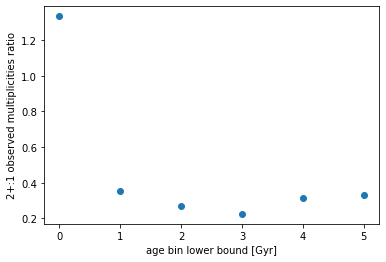

In [228]:
%matplotlib inline

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios = []
for i, a in enumerate(np.linspace(0,5,6)):
    if a < 12:
        temp = pnum.loc[(pnum.iso_age > a) & (pnum.iso_age <= a+1)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    #k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    #print(k_temp)
    #print(k_temp[1]/k_temp[0])
    ratio = (np.sum(k_temp)-k_temp[0])/k_temp[0]
    ratios.append(ratio)

print(len(ratios))
plt.scatter(np.linspace(0,5,6), ratios)
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.savefig('observed_multiplicities_with_age.png', format='png')
plt.show()

In [136]:
def assign_stellar_type(row):
    if (row.iso_teff > 3900) & (row.iso_teff <= 5300):
        return 'k'
    elif (row.iso_teff > 5300) & (row.iso_teff <= 6000):
        return 'g'
    elif (row.iso_teff > 6000) & (row.iso_teff <= 7600):
        return 'f'
    
def assign_age_bin(row): # meh, found a way around this so never mind
    if (row.iso_age > 0) & (row.iso_age <= 1):
        return 1
    

0 0 126
0 37 230
1 162 67
10 162 6
6 103 0
18 97 0
18
          0         1         2         3         4         5
K       NaN       NaN  0.000000  0.111111  0.200000  0.200000
G       NaN  0.233333  0.275591  0.165468  0.492754  0.168675
F  0.384615  0.250000  0.456522  0.000000       NaN       NaN


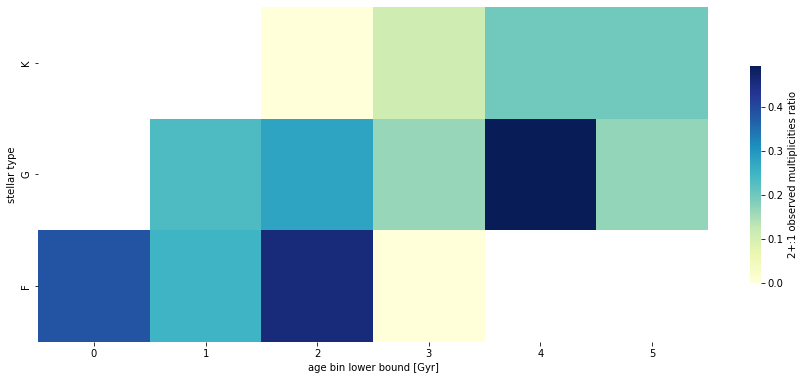

In [229]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios = []
for i, a in enumerate(np.linspace(0,5,6)):
    if a < 5:
        temp = pnum.loc[(pnum.iso_age > 2*a) & (pnum.iso_age <= 2*a+2)]
        temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
        temp_k = temp.loc[(temp.iso_teff > 3900) & (temp.iso_teff <= 5300)]
        temp_g = temp.loc[(temp.iso_teff > 5300) & (temp.iso_teff <= 6000)]
        temp_f = temp.loc[(temp.iso_teff > 6000) & (temp.iso_teff <= 7600)]
        print(len(temp_k), len(temp_g), len(temp_f))
    else:
        temp = pnum.loc[pnum.iso_age > 2*a]
        temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
        temp_k = temp.loc[(temp.iso_teff > 3900) & (temp.iso_teff <= 5300)]
        temp_g = temp.loc[(temp.iso_teff > 5300) & (temp.iso_teff <= 6000)]
        temp_f = temp.loc[(temp.iso_teff > 6000) & (temp.iso_teff <= 7600)]
        print(len(temp_k), len(temp_g), len(temp_f))
    
    k_temp_k = temp_k.koi_count.value_counts(sort=False)
    k_temp_k = list(k_temp_k)
    k_temp_k += [0.] * (6 - len(k_temp_k)) # pad with zeros to match length of k
    
    k_temp_g = temp_g.koi_count.value_counts(sort=False)
    k_temp_g = list(k_temp_g)
    k_temp_g += [0.] * (6 - len(k_temp_g)) # pad with zeros to match length of k
    
    k_temp_f = temp_f.koi_count.value_counts(sort=False)
    k_temp_f = list(k_temp_f)
    k_temp_f += [0.] * (6 - len(k_temp_f)) # pad with zeros to match length of k

    ratio_k = (np.sum(k_temp_k)-k_temp_k[0])/k_temp_k[0]
    ratio_g = (np.sum(k_temp_g)-k_temp_g[0])/k_temp_g[0]
    ratio_f = (np.sum(k_temp_f)-k_temp_f[0])/k_temp_f[0]
    ratios.append(ratio_k)
    ratios.append(ratio_g)
    ratios.append(ratio_f)

print(len(ratios))
ratios = np.array(ratios).reshape(6,3)

ratios_df = pd.DataFrame(ratios, columns = ['K','G','F']).T
print(ratios_df)
plt.figure(figsize=(15, 20))
sns.heatmap(ratios_df, square=True, cmap="YlGnBu", cbar_kws={'label': '2+:1 observed multiplicities ratio', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
#plt.savefig('observed_multiplicities_with_age_type.png', format='png')
plt.show()

Bootstrap to try to obviate the small number statistics.

6
[0.33272438 0.27522692 0.26218986 0.25326585 0.28850881 0.23776409]


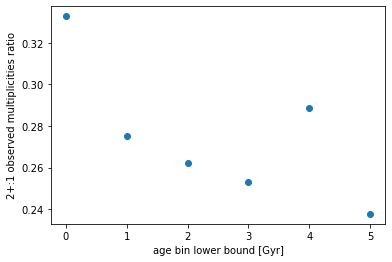

In [230]:
%matplotlib inline

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios_array = np.zeros(6) # 13
samples = 1000
for iteration in range(samples):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    ratios = []
    for i, a in enumerate(np.linspace(0,5,6)):
        if a < 5:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > 2*a) & (pnum.iso_age_bootstrapped <= 2*a+2)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > 2*a]
            #print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        #print(k_temp)
        #print(k_temp[1]/k_temp[0])
        ratio = (np.sum(k_temp)-k_temp[0])/k_temp[0]
        ratios.append(ratio)
        
    try:
        ratios_array += np.array(ratios)
    except:
        print("can't add first pass to nothing")

print(len(ratios_array))
print(ratios_array/samples)

plt.scatter(np.linspace(0,5,6), ratios_array/samples)
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
#plt.savefig('observed_multiplicities_with_age_bootstrapped.png', format='png')
plt.show()

         0         1         2         3         4         5         6   \
K  0.000000  0.004000  0.011833  0.044500  0.119433  0.137346  0.129068   
G  0.421041  0.284376  0.242286  0.229122  0.244251  0.245422  0.250980   
F  0.452699  0.323829  0.301592  0.293364  0.316609  0.337648  0.336662   

         7         8         9         10        11        12  
K  0.171741  0.228755  0.273750  0.291033  0.263081  0.103407  
G  0.270742  0.289045  0.304558  0.325414  0.315483  0.220255  
F  0.354161  0.419221  0.336532  0.207083  0.082833  0.107333  
       0        1        2       3       4       5       6       7       8   \
K   0.140    0.180    0.370   0.811   1.772   3.161   3.889   3.633   2.887   
G   3.835   12.194   30.883  50.099  60.759  67.350  63.659  55.074  46.110   
F  25.327  123.377  118.148  69.787  41.884  25.988  15.166   8.740   4.804   

       9       10      11      12  
K   2.606   2.527   2.375  15.058  
G  37.037  29.368  22.407  63.335  
F   2.871   1.466 

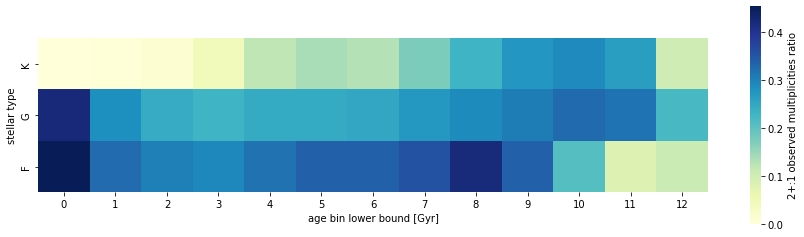

In [224]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

pnum['iso_teff_err'] = 0.5*(pnum.iso_teff_err1 + np.abs(pnum.iso_teff_err2))
ratios_df_array = pd.DataFrame()
counts_df_array = pd.DataFrame()
samples = 1000
for iteration in range(samples):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    pnum['iso_teff_bootstrapped'] = np.random.normal(pnum.iso_teff, pnum.iso_teff_err)
    ratios = []
    counts = []
    for i, a in enumerate(np.linspace(0,12,13)):
        if a < 12:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+1)]
            temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
            temp_k = temp.loc[(temp.iso_teff_bootstrapped > 3900) & (temp.iso_teff_bootstrapped <= 5300)]
            temp_g = temp.loc[(temp.iso_teff_bootstrapped > 5300) & (temp.iso_teff_bootstrapped <= 6000)]
            temp_f = temp.loc[(temp.iso_teff_bootstrapped > 6000) & (temp.iso_teff_bootstrapped <= 7600)]
            #print(len(temp_k), len(temp_g), len(temp_f))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
            temp_k = temp.loc[(temp.iso_teff_bootstrapped > 3900) & (temp.iso_teff_bootstrapped <= 5300)]
            temp_g = temp.loc[(temp.iso_teff_bootstrapped > 5300) & (temp.iso_teff_bootstrapped <= 6000)]
            temp_f = temp.loc[(temp.iso_teff_bootstrapped > 6000) & (temp.iso_teff_bootstrapped <= 7600)]
            #print(len(temp_k), len(temp_g), len(temp_f))
        
        counts.append(len(temp_k))
        counts.append(len(temp_g))
        counts.append(len(temp_f))
        
        k_temp_k = temp_k.koi_count.value_counts(sort=False)
        k_temp_k = list(k_temp_k)
        k_temp_k += [0.] * (6 - len(k_temp_k)) # pad with zeros to match length of k

        k_temp_g = temp_g.koi_count.value_counts(sort=False)
        k_temp_g = list(k_temp_g)
        k_temp_g += [0.] * (6 - len(k_temp_g)) # pad with zeros to match length of k

        k_temp_f = temp_f.koi_count.value_counts(sort=False)
        k_temp_f = list(k_temp_f)
        k_temp_f += [0.] * (6 - len(k_temp_f)) # pad with zeros to match length of k

        ratio_k = (np.sum(k_temp_k)-k_temp_k[0])/k_temp_k[0]
        ratio_g = (np.sum(k_temp_g)-k_temp_g[0])/k_temp_g[0]
        ratio_f = (np.sum(k_temp_f)-k_temp_f[0])/k_temp_f[0]
        ratios.append(ratio_k)
        ratios.append(ratio_g)
        ratios.append(ratio_f)

    ratios = np.array(ratios).reshape(13,3)
    ratios_df = pd.DataFrame(ratios, columns = ['K','G','F']).T.fillna(0)
    
    counts = np.array(counts).reshape(13,3)
    counts_df = pd.DataFrame(counts, columns = ['K','G','F']).T.fillna(0)
    
    if iteration==0:
        ratios_df_array = ratios_df
        counts_df_array = counts_df
    else:
        ratios_df_array += ratios_df
        counts_df_array += counts_df
    #print(ratios_df_array)    
        
print(ratios_df_array/samples)
print(counts_df_array/samples)

plt.figure(figsize=(15, 20))
sns.heatmap(ratios_df_array/samples, square=True, cmap="YlGnBu", cbar_kws={'label': '2+:1 observed multiplicities ratio', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
plt.savefig('observed_multiplicities_with_age_type_bootstrapped.png', format='png')
plt.show()

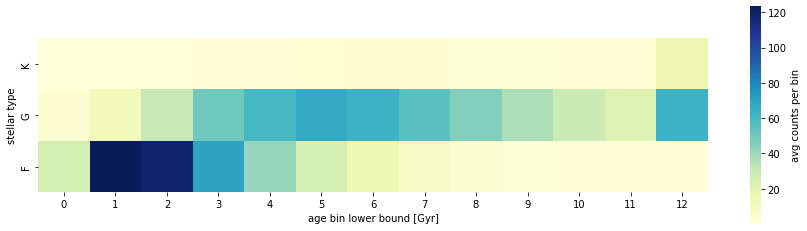

In [226]:
plt.figure(figsize=(15, 20))
sns.heatmap(counts_df_array/samples, square=True, cmap="YlGnBu", cbar_kws={'label': 'avg counts per bin', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
plt.savefig('counts_per_age_type_bootstrapped.png', format='png')
plt.show()

### Introduce age uncertainties in data and sample to make distribution of logLs

Read in cross-match so that I can redraw "ground truth" ages

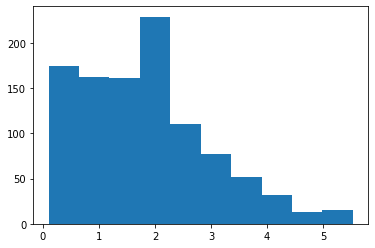

In [97]:
plt.hist(pnum.iso_age_err1)
plt.show()

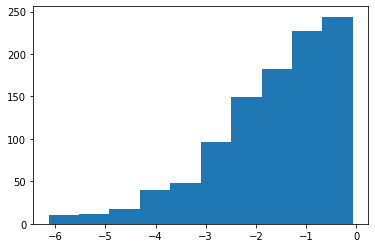

In [98]:
plt.hist(pnum.iso_age_err2)
plt.show()

In [167]:
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5 * (pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

In [94]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """

    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

model_young = df.young10_transit_multiplicity
model_old = df.old10_transit_multiplicity

# for each iteration, redraw stellar ages from given mode and std
# split into young and old
# compute k_young and k_old
# compare data with appropriate split in models
# compute logL
for i in range(100):
    young = 
    old = 
    young = np.random.normal(young.iso_age, young.iso_age_err, 1)
    
    k_young = list(young.koi_count.value_counts(sort=False))
    k_old = list(old.koi_count.value_counts(sort=False))
    k_young += [0.] * (6 - len(k_young)) # pad with zeros to match length of k
    k_old += [0.] * (6 - len(k_old)) # pad with zeros to match length of k
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    #k_temp = k_temp/k_temp[1]
    #k_temp = list(k_temp)
    #k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k


AttributeError: 'Series' object has no attribute 'koi_count'

In [101]:
pnum.apply(lambda x: np.random.normal(x.iso_age, x.iso_age_err, 1))

AttributeError: 'Series' object has no attribute 'iso_age'

In [103]:
pnum.iso_age_err

0       2.775
1       2.010
3       1.540
4       0.485
6       1.340
        ...  
1295    2.020
1296    0.365
1297    1.490
1298    0.455
1299    3.270
Name: iso_age_err, Length: 1025, dtype: float64

In [105]:
np.random.normal(np.array(pnum.iso_age), np.array(pnum.iso_age_err), 1)

ValueError: Output size (1,) is not compatible with broadcast dimensions of inputs (1025,).

In [106]:
np.array(pnum.iso_age)

array([13.04,  6.26,  4.02, ...,  3.11,  2.26,  7.02])